<a href="https://colab.research.google.com/github/juliuserbach/Semantic-Features/blob/master/Mask_R_CNN_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ftaubner/semantic_features_detection.git

Cloning into 'semantic_features_detection'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1400 (delta 3), reused 8 (delta 3), pack-reused 1392
Receiving objects: 100% (1400/1400), 113.86 MiB | 29.32 MiB/s, done.
Resolving deltas: 100% (855/855), done.


In [2]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100024&authkey=ADLJzehr2ENRggw" -O mapillary_vistas.zip

--2020-04-12 08:09:32--  https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100024&authkey=ADLJzehr2ENRggw
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kshtya.am.files.1drv.com/y4mculR4kQPwAoVYw9vGHYi3G3SrjTItsEn-2VMpSDox-6jLXG9ZvUpjBfzfuVQkF8O9drqxgKDpiXuIH6waiOB3it2YcYE3bcr-zLSZVZRjypI9G58BL1fX0ZB8iR_1PWcB2G94Qw7V3x3jwVVutmgn5guoACwgJSosIJPUs1oBIAL9YdY53QqepAolRQfdSP0-88_r6VtNS2B17r6nc6Unw/mapillary_vistas_instance_mapping.zip?download&psid=1 [following]
--2020-04-12 08:09:32--  https://kshtya.am.files.1drv.com/y4mculR4kQPwAoVYw9vGHYi3G3SrjTItsEn-2VMpSDox-6jLXG9ZvUpjBfzfuVQkF8O9drqxgKDpiXuIH6waiOB3it2YcYE3bcr-zLSZVZRjypI9G58BL1fX0ZB8iR_1PWcB2G94Qw7V3x3jwVVutmgn5guoACwgJSosIJPUs1oBIAL9YdY53QqepAolRQfdSP0-88_r6VtNS2B17r6nc6Unw/mapillary_vistas_instance_mapping.zip?download&psid=1
Resolvin

In [7]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100479&authkey=AJdjSPnfz5shCvk" -O mapillary_47.h5

--2020-04-12 08:40:09--  https://onedrive.live.com/download?cid=EA356294C6263A37&resid=EA356294C6263A37%21100479&authkey=AJdjSPnfz5shCvk
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://qyvpsa.am.files.1drv.com/y4m5RfdAugwdFVQ36U7RkLpv28OtERib33FTJUmdWuli82R-4K3RWg30UUm1IKxEs4XWPazHYLSHdb7ThLCKdbVqANtwz2kSoFamr5TTloqJlz0f7XzhSpyqoA7DIhlppgV0CFKNAfjvIzjsW0QJgGa_EKmqfagg3vSuw01Z4BbkXAGoHHPOGeDdtOgVAIj3v0izNXHthy_ZjrQxVHQLiA_sA/mask_rcnn_mapvistas_0047.h5?download&psid=1 [following]
--2020-04-12 08:40:10--  https://qyvpsa.am.files.1drv.com/y4m5RfdAugwdFVQ36U7RkLpv28OtERib33FTJUmdWuli82R-4K3RWg30UUm1IKxEs4XWPazHYLSHdb7ThLCKdbVqANtwz2kSoFamr5TTloqJlz0f7XzhSpyqoA7DIhlppgV0CFKNAfjvIzjsW0QJgGa_EKmqfagg3vSuw01Z4BbkXAGoHHPOGeDdtOgVAIj3v0izNXHthy_ZjrQxVHQLiA_sA/mask_rcnn_mapvistas_0047.h5?download&psid=1
Resolving qyvpsa.am.files.1d

In [0]:
!unzip -qq /content/mapillary_vistas.zip 'mapillary_vistas/validation/*' -d /content

In [0]:
!unzip -qq /content/mapillary_vistas.zip 'mapillary_vistas/config.json' -d /content

In [0]:
!pip install imgaug
!pip install Cython
!pip install pycocotools

In [0]:
import os
os.chdir('/content/semantic_features_detection/Notebook')

In [9]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
import imageio
%tensorflow_version 1.x
import tensorflow as tf


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Ignore Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
print(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/mapillary/"))  # To find local version
import mapillary

%matplotlib inline

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(MODEL_DIR)

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
print('finished')

TensorFlow 1.x selected.
/content/semantic_features_detection


Using TensorFlow backend.


... done downloading pretrained model!
/content/semantic_features_detection/logs
... done downloading pretrained model!
finished


In [10]:
class_names= ['Unlabeled', 'Bird', 'Ground Animal', 'Curb', 'Fence', 'Guard Rail', 
              'Barrier', 'Wall', 'Bike Lane', 'Crosswalk - Plain', 'Curb Cut', 'Parking', 
              'Pedestrian Area', 'Rail Track', 'Road', 'Service Lane', 'Sidewalk', 'Bridge', 
              'Building', 'Tunnel', 'Person', 'Bicyclist', 'Motorcyclist', 'Other Rider', 
              'Lane Marking - Crosswalk', 'Lane Marking - General', 'Mountain', 'Sand', 
              'Sky', 'Snow', 'Terrain', 'Vegetation', 'Water', 'Banner', 'Bench', 'Bike Rack',
              'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox',
              'Manhole', 'Phone Booth', 'Pothole', 'Street Light', 'Pole', 'Traffic Sign Frame', 
              'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)',
              'Trash Can', 'Bicycle', 'Boat', 'Bus', 'Car', 'Caravan', 'Motorcycle', 'On Rails',
              'Other Vehicle', 'Trailer', 'Truck', 'Wheeled Slow', 'Car Mount', 'Ego Vehicle']
selected_classes = [34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52]
print(selected_classes)

[34, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52]


In [0]:
# TRAIN_DIR = '/content/mapillary_vistas'
# # Training dataset
# dataset_train = mapillary.MapillaryDataset()
# dataset_train.load_vistas(dataset_dir=TRAIN_DIR, subset='training', class_ids=selected_classes)
# dataset_train.prepare()

# Validation dataset
VAL_DIR = '/content/mapillary_vistas'

dataset_val = mapillary.MapillaryDataset()
dataset_val.load_vistas(dataset_dir=VAL_DIR, subset='validation', class_ids=selected_classes)
dataset_val.prepare()

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


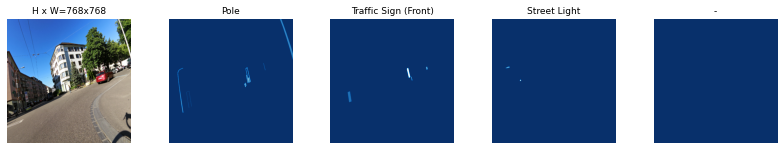

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


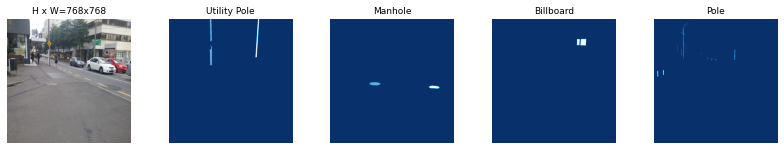

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


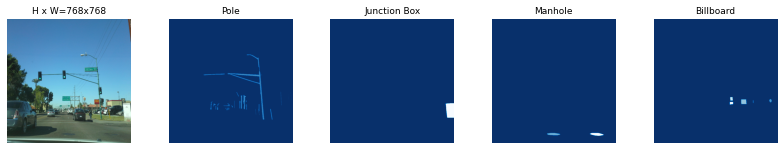

['BG', 'Bench', 'Billboard', 'Catch Basin', 'CCTV Camera', 'Fire Hydrant', 'Junction Box', 'Mailbox', 'Manhole', 'Phone Booth', 'Street Light', 'Pole', 'Traffic Sign Frame', 'Utility Pole', 'Traffic Light', 'Traffic Sign (Back)', 'Traffic Sign (Front)', 'Trash Can']


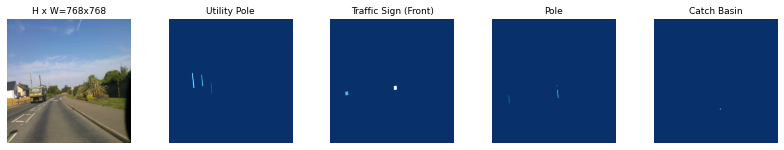

In [13]:
image_ids = np.random.choice(dataset_val.image_ids, 4)
for image_id in image_ids:
    image = dataset_val.load_image(image_id)
    print(dataset_val.class_names)
    mask, class_ids = dataset_val.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_val.class_names[1:])

In [16]:
class InferenceConfig(mapillary.mapvistas):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0
    NUM_CLASSES = len(selected_classes) + 1
config = InferenceConfig()
config.display()
batch_size = config.BATCH_SIZE


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  640
IMAGE_META_SIZE                30
IMAGE_MIN_DIM                  640
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [640 640   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

In [21]:
# Create model in training mode
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)
model_path = '/content/mapillary_47.h5'
model.load_weights(model_path, by_name=True)




Instructions for updating:
Use `tf.cast` instead.


In [0]:
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'])
        APs.append(AP)
    return APs

In [23]:
image_ids = np.random.choice(dataset_val.image_ids, 300)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

/content/semantic_features_detection/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)
/content/semantic_features_detection/mrcnn/utils.py:734: RuntimeWarning: invalid value encountered in true_divide
  recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)


mAP @ IoU=50:  nan


In [0]:
def compute_batch_ap_classwise(image_ids):
    mAPs = np.zeros([len(1, selected_classes)])
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset_val, config,
                                  image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        
        for i, class_id in enumerate(selected_classes):
            mask = np.where(gt_class_id == class_id, True, False)
            #print(mask)        
            gt_class_id = gt_class_id[mask]
            #print(gt_bbox.shape)        
            gt_bbox = gt_bbox[mask,:]
            #print(gt_mask.shape)        
            gt_mask = gt_mask[:,:,mask]
                            
            # r['class_ids'] = np.array(list(map(lambda x: coco_to_sel[x], r['class_ids'])))
            mask = np.where(r['class_ids'] == class_id, True, False)
            r['rois'] = r['rois'][mask,:]
            r['class_ids'] = r['class_ids'][mask]
            r['scores'] = r['scores'][mask]
            r['masks'] = r['masks'][:,:,mask] 
            if len(gt_class_id) != 0:
                AP, precisions, recalls, overlaps =\
                    utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                      r['rois'], r['class_ids'], r['scores'], r['masks'])
                mAPs[i] = (mAPs[i] + AP)

    return APs

In [31]:
image_ids = np.random.choice(dataset_val.image_ids, 10)
APs = compute_batch_ap_classwise(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

KeyboardInterrupt: ignored